# 지역별 인구구조 시각화

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

## 데이터프레임 생성 및 전처리

### 데이터프레임 생성

In [2]:
df = pd.read_csv('data/202110_202110_주민등록인구및세대현황_월간.csv', encoding='cp949')
df

,행정구역,2021년10월_총인구수,2021년10월_세대수,2021년10월_세대당 인구,2021년10월_남자 인구수,2021년10월_여자 인구수,2021년10월_남여 비율
0,서울특별시 (1100000000),"9,532,428","4,422,587",2.16,"4,630,630","4,901,798",0.94
1,서울특별시 종로구 (1111000000),"145,346","73,613",1.97,"70,552","74,794",0.94
2,서울특별시 종로구 청운효자동(1111051500),"12,011","5,252",2.29,"5,553","6,458",0.86
3,서울특별시 종로구 사직동(1111053000),"9,367","4,686",2.00,"4,206","5,161",0.81
4,서울특별시 종로구 삼청동(1111054000),"2,478","1,251",1.98,"1,178","1,300",0.91
...,...,...,...,...,...,...,...
3847,제주특별자치도 서귀포시 서홍동(5013058000),"10,999","4,517",2.44,"5,435","5,564",0.98
3848,제주특별자치도 서귀포시 대륜동(5013059000),"15,216","6,760",2.25,"7,691","7,525",1.02
3849,제주특별자치도 서귀포시 대천동(5013060000),"13,900","6,474",2.15,"7,048","6,852",1.03
3850,제주특별자치도 서귀포시 중문동(5013061000),"11,886","5,731",2.07,"6,057","5,829",1.04


### 컬럼명 변경

In [3]:
df.columns=['행정구역','총인구수','세대수','세대당 인구','남자 인구수','여자 인구수','남여 비율']

In [4]:
df.head(1)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),"9,532,428","4,422,587",2.16,"4,630,630","4,901,798",0.94


### 자료형 확인, 변환

In [5]:
# 자료형 확인
df.dtypes

행정구역       object
총인구수       object
세대수        object
세대당 인구    float64
남자 인구수     object
여자 인구수     object
남여 비율     float64
dtype: object

In [6]:
# 숫자형으로 변환
df['총인구수'] = df['총인구수'].str.replace(',','').astype('int64')

In [7]:
df['세대수'] = df['세대수'].str.replace(',','').astype('int64')

In [8]:
df['남자 인구수'] = df['남자 인구수'].str.replace(',','').astype('int64')

In [9]:
df['여자 인구수'] = df['여자 인구수'].str.replace(',','').astype('int64')

In [10]:
df.dtypes

행정구역       object
총인구수        int64
세대수         int64
세대당 인구    float64
남자 인구수      int64
여자 인구수      int64
남여 비율     float64
dtype: object

## 시도별 서브셋 생성
* `컬럼.str.contains(문자열)` : 문자열이 포함된 데이터 추출

In [11]:
df_sido = df[df['행정구역'].str.contains('00000000')].copy()
df_sido

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9532428,4422587,2.16,4630630,4901798,0.94
452,부산광역시 (2600000000),3356311,1541975,2.18,1642368,1713943,0.96
674,대구광역시 (2700000000),2390721,1062993,2.25,1178486,1212235,0.97
826,인천광역시 (2800000000),2945009,1294158,2.28,1474536,1470473,1.00
999,광주광역시 (2900000000),1442454,643841,2.24,713483,728971,0.98
1102,대전광역시 (3000000000),1454228,662615,2.19,725742,728486,1.00
1187,울산광역시 (3100000000),1122566,481811,2.33,576723,545843,1.06
1249,세종특별자치시 (3600000000),368276,151639,2.43,183879,184397,1.00
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01
1882,강원도 (4200000000),1537717,743798,2.07,774008,763709,1.01


* 시도명 컬럼 추가

In [12]:
df_sido['시도명'] = df_sido['행정구역'].str.split(' ').str[0]

In [13]:
df_sido.head(3)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명
0,서울특별시 (1100000000),9532428,4422587,2.16,4630630,4901798,0.94,서울특별시
452,부산광역시 (2600000000),3356311,1541975,2.18,1642368,1713943,0.96,부산광역시
674,대구광역시 (2700000000),2390721,1062993,2.25,1178486,1212235,0.97,대구광역시


# 시도별 인구수 시각화
* 인구 수가 가장 많은 지역은 어디일까?
* 인구 수가 가장 적은 지역은 어디일까?

## 총 인구수로 데이터 정렬하기

In [14]:
df_sido = df_sido.sort_values('총인구수', ascending=False)
df_sido

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01,경기도
0,서울특별시 (1100000000),9532428,4422587,2.16,4630630,4901798,0.94,서울특별시
452,부산광역시 (2600000000),3356311,1541975,2.18,1642368,1713943,0.96,부산광역시
3469,경상남도 (4800000000),3318161,1503397,2.21,1670394,1647767,1.01,경상남도
826,인천광역시 (2800000000),2945009,1294158,2.28,1474536,1470473,1.00,인천광역시
3100,경상북도 (4700000000),2627925,1273579,2.06,1324128,1303797,1.02,경상북도
674,대구광역시 (2700000000),2390721,1062993,2.25,1178486,1212235,0.97,대구광역시
2265,충청남도 (4400000000),2118977,999286,2.12,1083133,1035844,1.05,충청남도
2754,전라남도 (4600000000),1834653,901203,2.04,923037,911616,1.01,전라남도
2492,전라북도 (4500000000),1789770,847406,2.11,890378,899392,0.99,전라북도


## 막대그래프로 시각화하기

### matplotlib.pyplot으로 시각화하기

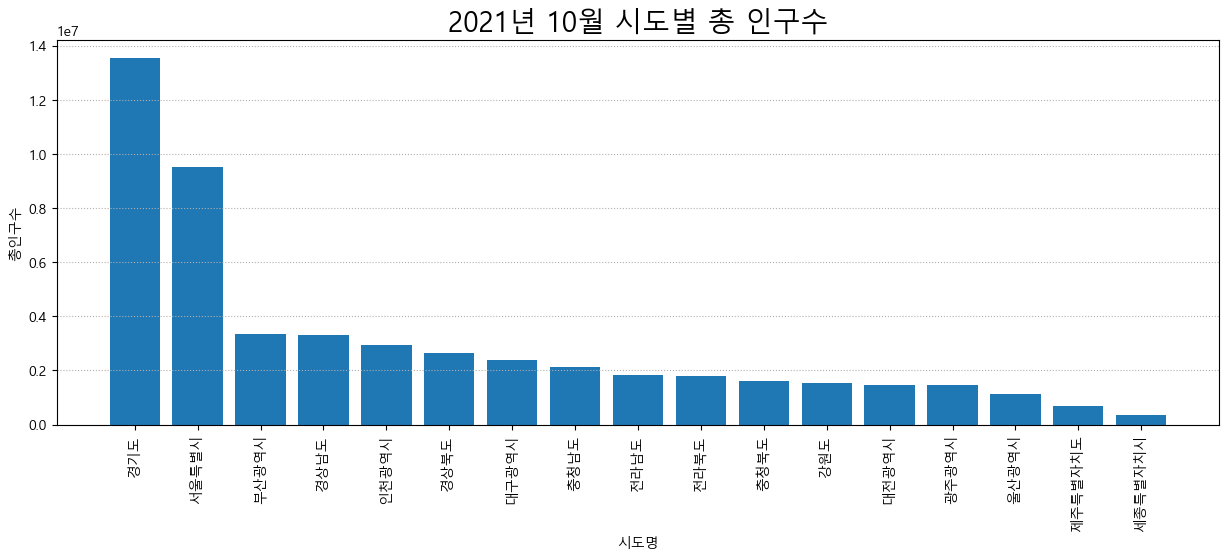

In [15]:
plt.rcParams['figure.figsize']=(15,5)

plt.bar(df_sido['시도명'], df_sido['총인구수'])
plt.xticks(rotation=90)
plt.title('2021년 10월 시도별 총 인구수', size=20)
plt.xlabel('시도명')
plt.ylabel('총인구수')
plt.grid(axis='y', ls=':')
plt.show()

### seaborn으로 시각화하기

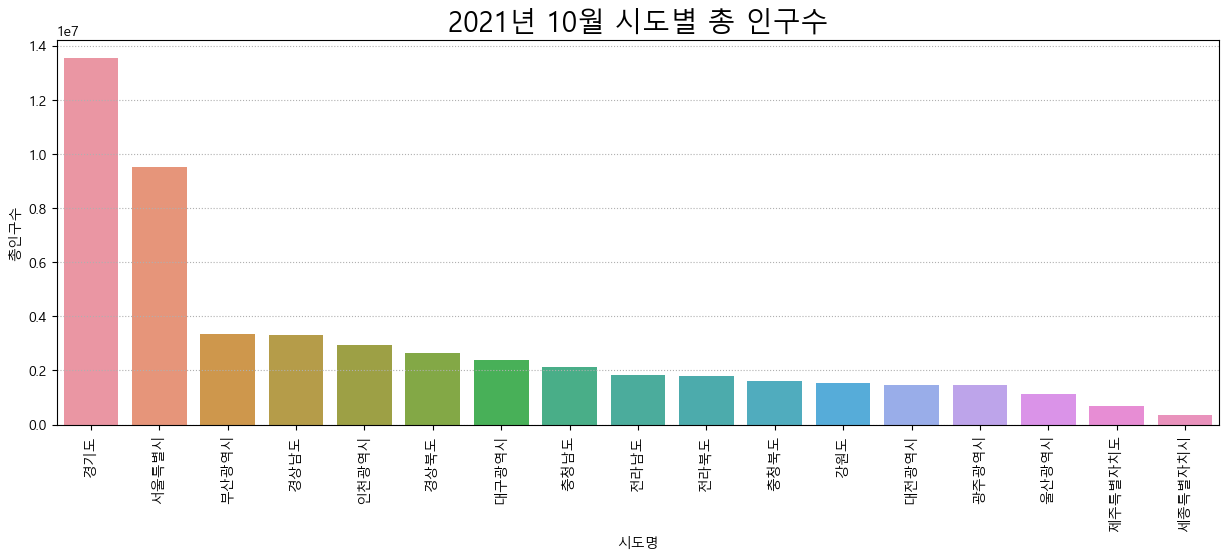

In [16]:
sns.barplot(data=df_sido, x='시도명', y='총인구수')
plt.title('2021년 10월 시도별 총 인구수', size=20)
plt.grid(axis='y', ls=':')
plt.xticks(rotation=90)
plt.show()

## 파이그래프로 시각화하기

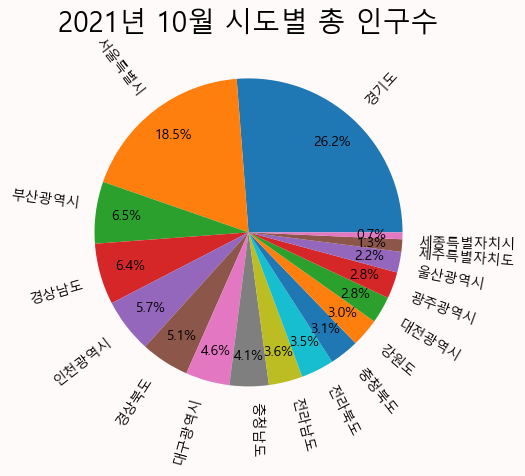

In [17]:
plt.figure(facecolor='snow')
plt.pie(df_sido['총인구수'], labels=df_sido['시도명']
       ,autopct='%.1f%%', pctdistance=0.8, rotatelabels=True)
plt.title('2021년 10월 시도별 총 인구수', size=20)
plt.show()

# 시도별 세대당 인구수 시각화
* 2중 y축 표시하기<br>
`fig, ax1 = plt.subplots()`<br>
`ax2 = ax1.twinx()`

In [18]:
df_sido

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01,경기도
0,서울특별시 (1100000000),9532428,4422587,2.16,4630630,4901798,0.94,서울특별시
452,부산광역시 (2600000000),3356311,1541975,2.18,1642368,1713943,0.96,부산광역시
3469,경상남도 (4800000000),3318161,1503397,2.21,1670394,1647767,1.01,경상남도
826,인천광역시 (2800000000),2945009,1294158,2.28,1474536,1470473,1.00,인천광역시
3100,경상북도 (4700000000),2627925,1273579,2.06,1324128,1303797,1.02,경상북도
674,대구광역시 (2700000000),2390721,1062993,2.25,1178486,1212235,0.97,대구광역시
2265,충청남도 (4400000000),2118977,999286,2.12,1083133,1035844,1.05,충청남도
2754,전라남도 (4600000000),1834653,901203,2.04,923037,911616,1.01,전라남도
2492,전라북도 (4500000000),1789770,847406,2.11,890378,899392,0.99,전라북도


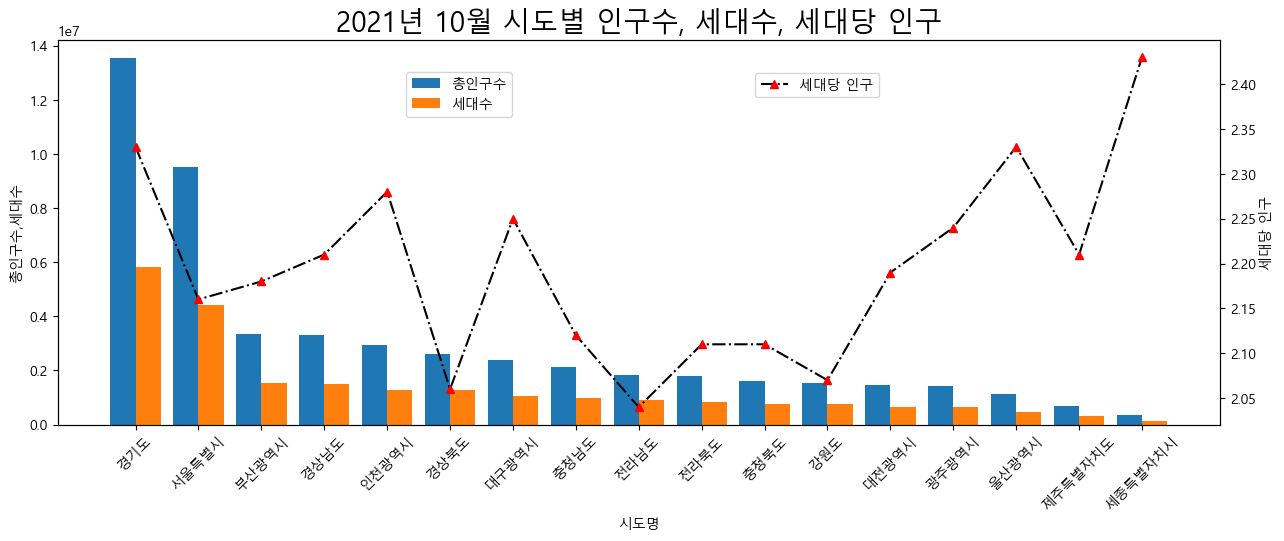

In [19]:
fig, ax1 = plt.subplots()
ax1.bar(df_sido['시도명'], df_sido['총인구수'], width=-0.4, align='edge', label='총인구수')
ax1.bar(df_sido['시도명'], df_sido['세대수'], width=0.4, align='edge', label='세대수')
ax1.legend(loc=(0.3, 0.8))
ax1.set_xlabel('시도명')
ax1.set_ylabel('총인구수,세대수')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(df_sido['시도명'], df_sido['세대당 인구'], 'k^-.', mfc='r', mec='r', label='세대당 인구')
ax2.legend(loc=(0.6, 0.85))
ax2.set_ylabel('세대당 인구')

ax2.set_title('2021년 10월 시도별 인구수, 세대수, 세대당 인구', size=20)

plt.show()

# 시도별 성별 인구수 시각화

In [20]:
df_sido.head(3)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01,경기도
0,서울특별시 (1100000000),9532428,4422587,2.16,4630630,4901798,0.94,서울특별시
452,부산광역시 (2600000000),3356311,1541975,2.18,1642368,1713943,0.96,부산광역시


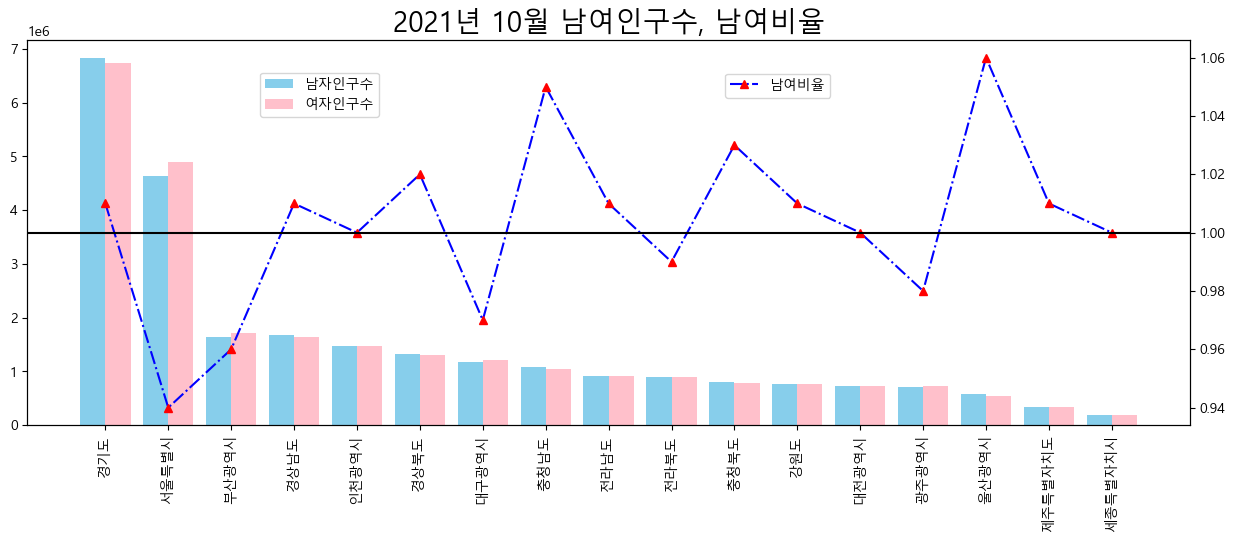

In [21]:
fig, ax1 = plt.subplots()
ax1.bar(df_sido['시도명'], df_sido['남자 인구수'], width=-0.4, align='edge', color='skyblue', label='남자인구수')
ax1.bar(df_sido['시도명'], df_sido['여자 인구수'], width=0.4, align='edge', color='pink', label='여자인구수')
ax1.legend(loc=(0.2,0.8))
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(df_sido['시도명'], df_sido['남여 비율'], 'b^-.', mfc='r',mec='r', label='남여비율')
ax2.legend(loc=(0.6,0.85))
ax2.axhline(1, color='k')
ax2.set_title('2021년 10월 남여인구수, 남여비율', size=20)

plt.show()

## 성별 인구수 차이

### 성별 인구수 차이 컬럼 생성
* 내림차순으로 정렬

In [22]:
df_sido['남여인구수차이'] = df_sido['남자 인구수']-df_sido['여자 인구수']
df_sido = df_sido.sort_values('남여인구수차이', ascending=False)
df_sido

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명,남여인구수차이
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01,경기도,90473
2265,충청남도 (4400000000),2118977,999286,2.12,1083133,1035844,1.05,충청남도,47289
1187,울산광역시 (3100000000),1122566,481811,2.33,576723,545843,1.06,울산광역시,30880
2095,충청북도 (4300000000),1596948,757980,2.11,810093,786855,1.03,충청북도,23238
3469,경상남도 (4800000000),3318161,1503397,2.21,1670394,1647767,1.01,경상남도,22627
3100,경상북도 (4700000000),2627925,1273579,2.06,1324128,1303797,1.02,경상북도,20331
2754,전라남도 (4600000000),1834653,901203,2.04,923037,911616,1.01,전라남도,11421
1882,강원도 (4200000000),1537717,743798,2.07,774008,763709,1.01,강원도,10299
826,인천광역시 (2800000000),2945009,1294158,2.28,1474536,1470473,1.00,인천광역시,4063
3806,제주특별자치도 (5000000000),676569,306741,2.21,339195,337374,1.01,제주특별자치도,1821


### 시각화

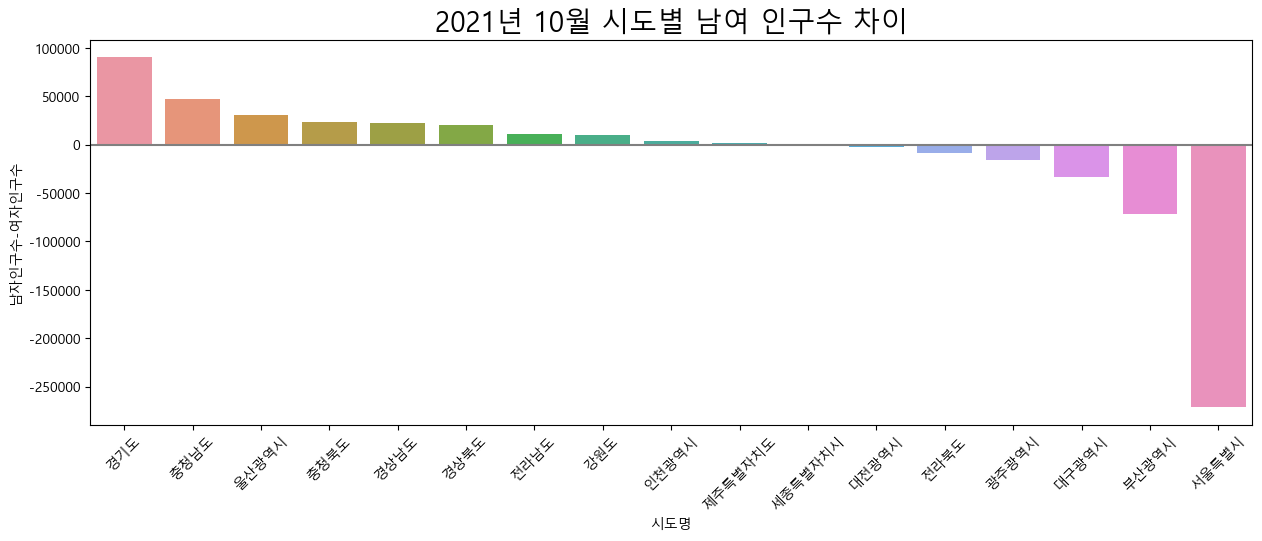

In [23]:
sns.barplot(data=df_sido, x='시도명', y='남여인구수차이')
plt.xticks(rotation=45)
plt.axhline(0, color='gray')
plt.title('2021년 10월 시도별 남여 인구수 차이', size=20)
plt.ylabel('남자인구수-여자인구수')
plt.show()

# 서울시 구별/동별 인구수 시각화

## 서울시 구별 인구수 시각화

### 서브셋 생성

In [24]:
df_seoul = df[df['행정구역'].str.find('구 (11')>0].copy()

In [25]:
df_seoul['구'] = df_seoul['행정구역'].str.split(' ').str[1]

In [26]:
df_seoul = df_seoul.sort_values('총인구수', ascending=False)
df_seoul

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,구
404,서울특별시 송파구 (1171000000),659239,282185,2.34,317773,341466,0.93,송파구
256,서울특별시 강서구 (1150000000),575370,270623,2.13,277041,298329,0.93,강서구
381,서울특별시 강남구 (1168000000),533878,234533,2.28,255473,278405,0.92,강남구
168,서울특별시 노원구 (1135000000),512129,217201,2.36,246650,265479,0.93,노원구
340,서울특별시 관악구 (1162000000),487357,276315,1.76,244844,242513,1.01,관악구
188,서울특별시 은평구 (1138000000),473369,214126,2.21,226514,246855,0.92,은평구
432,서울특별시 강동구 (1174000000),463752,201428,2.30,227755,235997,0.97,강동구
237,서울특별시 양천구 (1147000000),448634,181434,2.47,219862,228772,0.96,양천구
118,서울특별시 성북구 (1129000000),432081,195126,2.21,208308,223773,0.93,성북구
362,서울특별시 서초구 (1165000000),415083,171083,2.43,198470,216613,0.92,서초구


### 시각화

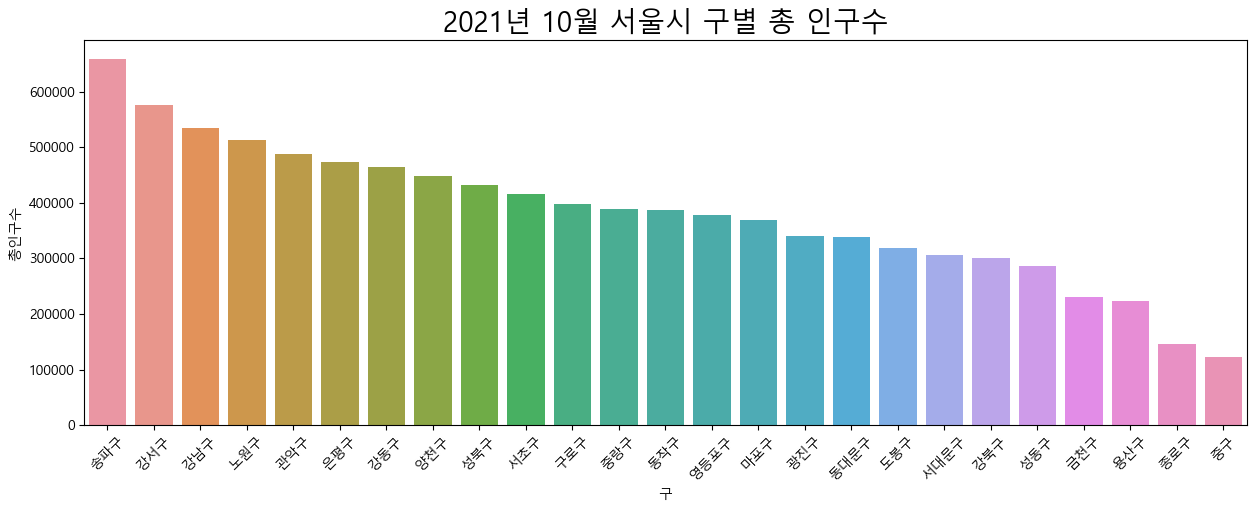

In [27]:
sns.barplot(data=df_seoul, x='구', y='총인구수')
plt.title('2021년 10월 서울시 구별 총 인구수', size=20)
plt.xticks(rotation=45)
plt.show()

## 동별 인구수 시각화
* 송파구 동별 인구수 시각화

### 서브셋 만들기

In [28]:
df_song = df[df['행정구역'].str.find('동(1171')>0].copy()

In [29]:
df_song['동'] = df_song['행정구역'].str.split(' ').str[2].str.split('(').str[0]
df_song

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,동
405,서울특별시 송파구 풍납1동(1171051000),12989,6027,2.16,6355,6634,0.96,풍납1동
406,서울특별시 송파구 풍납2동(1171052000),24977,11019,2.27,11873,13104,0.91,풍납2동
407,서울특별시 송파구 거여1동(1171053100),12615,5648,2.23,6367,6248,1.02,거여1동
408,서울특별시 송파구 거여2동(1171053200),18811,8153,2.31,9252,9559,0.97,거여2동
409,서울특별시 송파구 마천1동(1171054000),19005,8785,2.16,9718,9287,1.05,마천1동
410,서울특별시 송파구 마천2동(1171055000),18845,8726,2.16,9587,9258,1.04,마천2동
411,서울특별시 송파구 방이1동(1171056100),15771,6263,2.52,7603,8168,0.93,방이1동
412,서울특별시 송파구 방이2동(1171056200),26657,15316,1.74,12388,14269,0.87,방이2동
413,서울특별시 송파구 오륜동(1171056600),18063,5929,3.05,8857,9206,0.96,오륜동
414,서울특별시 송파구 오금동(1171057000),38637,15663,2.47,18739,19898,0.94,오금동


In [30]:
df_song = df_song.sort_values('총인구수', ascending=False)

### 시각화

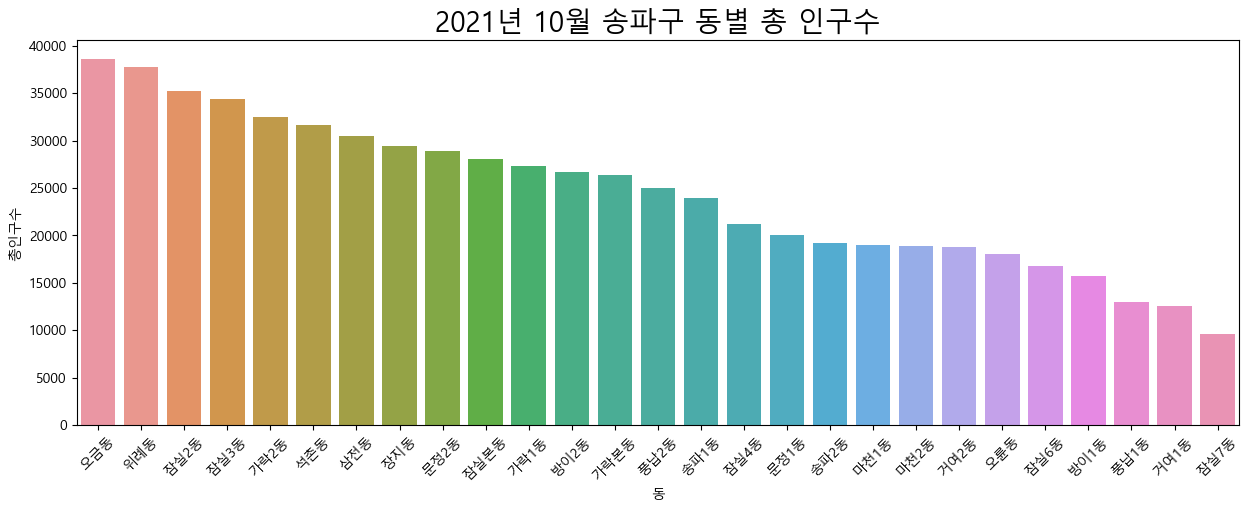

In [31]:
sns.barplot(data=df_song, x='동', y='총인구수')
plt.title('2021년 10월 송파구 동별 총 인구수', size=20)
plt.xticks(rotation=45)
plt.show()